## Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_json('data/data.json')

In [4]:
df.shape

(14337, 44)

In [5]:
df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA
5,premium,1300496400,117,6,US,USD,0.0,<p>Come join the Bluegrass Stallions as they t...,bluegrassstallions.com,1294421810,...,"[{u'event_id': 1179983, u'cost': 8.0, u'availa...",299,1268579110,1,,US,38.209797,-84.558831,Georgetown College Alumni Gymnasium,KY
6,premium,1297909800,28,5,US,USD,1.0,<p> </p>\r\n<p> </p>\r\n<p> </p>,naboe.org,1294425018,...,"[{u'event_id': 1180179, u'cost': 22.63, u'avai...",706,1233437951,3,6N East St,US,39.414270,-77.405089,Danielle's Restaurant,MD
7,premium,1296709200,974,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294427837,...,"[{u'event_id': 1180391, u'cost': 14.0, u'avail...",71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC
8,premium,1298185200,4388,4,US,USD,0.0,"<p style=""text-align: center;""><font face=""boo...",credosf.com,1294428122,...,"[{u'event_id': 1180423, u'cost': 250.0, u'avai...",0,1294428121,3,465 California Street,US,37.792847,-122.402082,,
9,premium,1297314000,974,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294428286,...,"[{u'event_id': 1180435, u'cost': 14.0, u'avail...",71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC


In [6]:
df.acct_type.unique()

array([u'fraudster_event', u'premium', u'spammer_warn', u'fraudster',
       u'spammer_limited', u'spammer_noinvite', u'locked', u'tos_lock',
       u'tos_warn', u'fraudster_att', u'spammer_web', u'spammer'], dtype=object)

In [7]:
df['fraud'] = df['acct_type'].apply(lambda x: 1 if 'fraud' in x.lower() else 0)

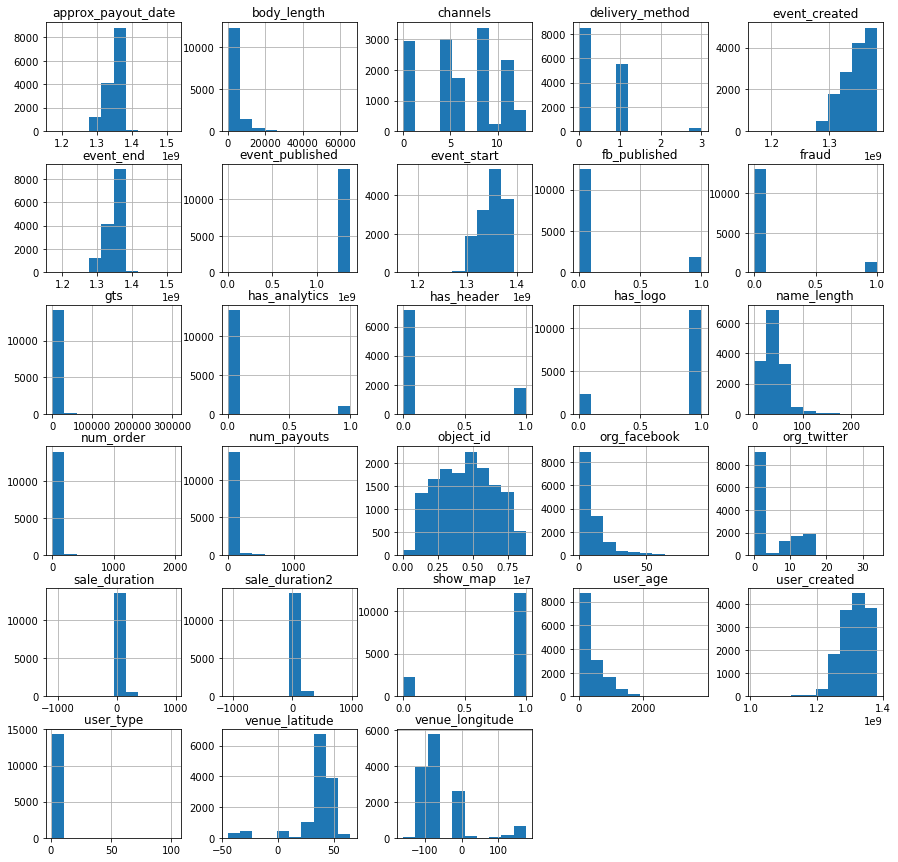

In [8]:
df.hist(figsize=(15,15))
plt.show()

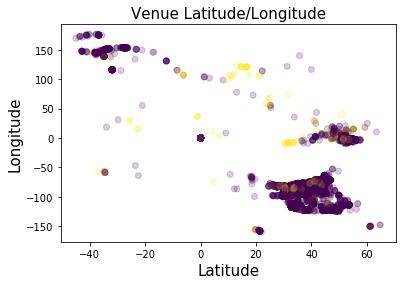

In [8]:
plt.scatter(df['venue_latitude'], df['venue_longitude'], c=df['fraud'], alpha=0.2)
plt.title('Venue Latitude/Longitude', {'fontsize':15})
plt.xlabel('Latitude', {'fontsize':15})
plt.ylabel('Longitude', {'fontsize':15})
plt.show()

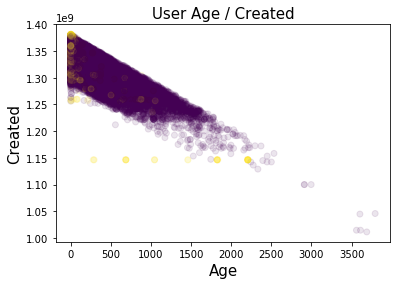

In [9]:
plt.scatter(df['user_age'], df['user_created'], c=df['fraud'], alpha=0.1)
plt.title('User Age / Created', {'fontsize':15})
plt.xlabel('Age', {'fontsize':15})
plt.ylabel('Created', {'fontsize':15})
plt.show()

[]

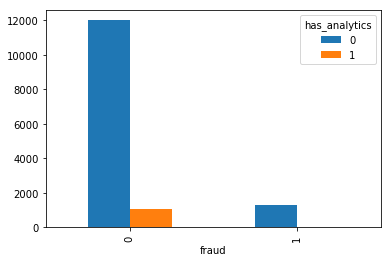

In [10]:
df_crosstab1 = pd.crosstab(df['fraud'],df['has_analytics'])
df_crosstab1.plot(kind='bar')
plt.plot()

## Dealing with NaNs

In [11]:
def populate_Nan_values_with_median(df,column_list):
    for col in column_list:
        med_val = df[col].median()
        df[col].fillna(value=med_val,inplace=True)

In [12]:
column_list = ['org_twitter',
               'delivery_method',
               'org_facebook',
               'sale_duration',
               'venue_longitude',
               'has_header',
               'event_published',
               'venue_latitude']

In [13]:
populate_Nan_values_with_median(df, column_list)

In [14]:
df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,39.974104,-79.425579,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0
5,premium,1300496400,117,6,US,USD,0.0,<p>Come join the Bluegrass Stallions as they t...,bluegrassstallions.com,1294421810,...,299,1268579110,1,,US,38.209797,-84.558831,Georgetown College Alumni Gymnasium,KY,0
6,premium,1297909800,28,5,US,USD,1.0,<p> </p>\r\n<p> </p>\r\n<p> </p>,naboe.org,1294425018,...,706,1233437951,3,6N East St,US,39.414270,-77.405089,Danielle's Restaurant,MD,0
7,premium,1296709200,974,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294427837,...,71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC,0
8,premium,1298185200,4388,4,US,USD,0.0,"<p style=""text-align: center;""><font face=""boo...",credosf.com,1294428122,...,0,1294428121,3,465 California Street,US,37.792847,-122.402082,,,0
9,premium,1297314000,974,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294428286,...,71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC,0


## Model 
### Random Forest

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

In [16]:
def print_scores(y_test, predictions):
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))
    return None

In [17]:
X_df = df[['user_age',
           'user_type',
           'org_twitter',
           'delivery_method',
           'org_facebook',
           'sale_duration2',
           'sale_duration',
           'has_logo',
           'channels',
           'name_length',
           'body_length',
           'venue_longitude',
           'user_created',
           'fb_published',
           'has_analytics',
           'num_payouts',
           'has_header',
           'num_order',
           'event_published',
           'show_map',
           'event_start',
           'approx_payout_date',
           'event_end',
           'gts',
           'event_created',
           'venue_latitude'
          ]]

In [18]:
y_df = df['fraud']

In [19]:
X_df.shape

(14337, 26)

In [20]:
y_df.shape

(14337,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=42)

In [22]:
rfc = RandomForestClassifier(bootstrap= True,
 class_weight= None,
 criterion= 'gini',
 max_depth= 10,
 max_features= 'auto',
 max_leaf_nodes= None,
 min_impurity_split= 1e-07,
 min_samples_leaf= 20,
 min_samples_split= 40,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 150,
 n_jobs= 5,
 oob_score= True,
 random_state= 0,
 verbose= 0,
 warm_start= False)

In [23]:
rf_model = rfc.fit(X_train, y_train)

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

In [24]:
rf_model.oob_score_

0.9704241071428571

In [25]:
rf_y_pred = rf_model.predict(X_test)

In [26]:
rf_model.score(X_train,y_train)

0.9740513392857143

In [27]:
rf_model.score(X_test,y_test)

0.9684797768479777

In [28]:
print_scores(y_test, rf_y_pred)

('Accuracy:', 0.9684797768479777)
('Precision:', 0.90804597701149425)
('Recall:', 0.72699386503067487)


In [29]:
rf_model.feature_importances_

array([  8.61750283e-02,   4.96057346e-02,   1.35150187e-02,
         8.12820269e-03,   2.46552221e-02,   2.04263527e-01,
         1.58017380e-01,   3.68302438e-03,   7.03121750e-03,
         2.48146671e-02,   3.51502661e-02,   7.61383399e-03,
         2.83270460e-02,   4.49364336e-04,   1.32756798e-07,
         5.77292267e-02,   1.16233992e-04,   1.04643688e-01,
         8.12601428e-03,   3.26019028e-04,   8.66595039e-03,
         1.03453265e-02,   9.19046493e-03,   1.34841773e-01,
         9.94824565e-03,   4.63739129e-03])

In [30]:
feature_importance = {}
for label, importance in zip(X_train.columns, rf_model.feature_importances_):
    feature_importance[label] = importance

#feature_importance
sorted(feature_importance.items(), key=lambda x: (-x[1]))

[(u'sale_duration2', 0.20426352742189158),
 (u'sale_duration', 0.15801737978969788),
 (u'gts', 0.13484177317110657),
 (u'num_order', 0.1046436882782518),
 (u'user_age', 0.086175028273143425),
 (u'num_payouts', 0.057729226705314503),
 (u'user_type', 0.049605734604420818),
 (u'body_length', 0.035150266092310409),
 (u'user_created', 0.028327046046029807),
 (u'name_length', 0.024814667111288529),
 (u'org_facebook', 0.024655222121577419),
 (u'org_twitter', 0.013515018681632341),
 (u'approx_payout_date', 0.0103453265033479),
 (u'event_created', 0.0099482456451061071),
 (u'event_end', 0.0091904649262313717),
 (u'event_start', 0.008665950388338799),
 (u'delivery_method', 0.0081282026894354178),
 (u'event_published', 0.0081260142819158179),
 (u'venue_longitude', 0.007613833986330489),
 (u'channels', 0.0070312174957830927),
 (u'venue_latitude', 0.0046373912947730682),
 (u'has_logo', 0.0036830243788910097),
 (u'fb_published', 0.00044936433615437441),
 (u'show_map', 0.00032601902815983762),
 (u'ha

[  2.04263527e-01   1.58017380e-01   1.34841773e-01   1.04643688e-01
   8.61750283e-02   5.77292267e-02   4.96057346e-02   3.51502661e-02
   2.83270460e-02   2.48146671e-02   2.46552221e-02   1.35150187e-02
   1.03453265e-02   9.94824565e-03   9.19046493e-03   8.66595039e-03
   8.12820269e-03   8.12601428e-03   7.61383399e-03   7.03121750e-03
   4.63739129e-03   3.68302438e-03   4.49364336e-04   3.26019028e-04
   1.16233992e-04   1.32756798e-07]


(-1, 28)

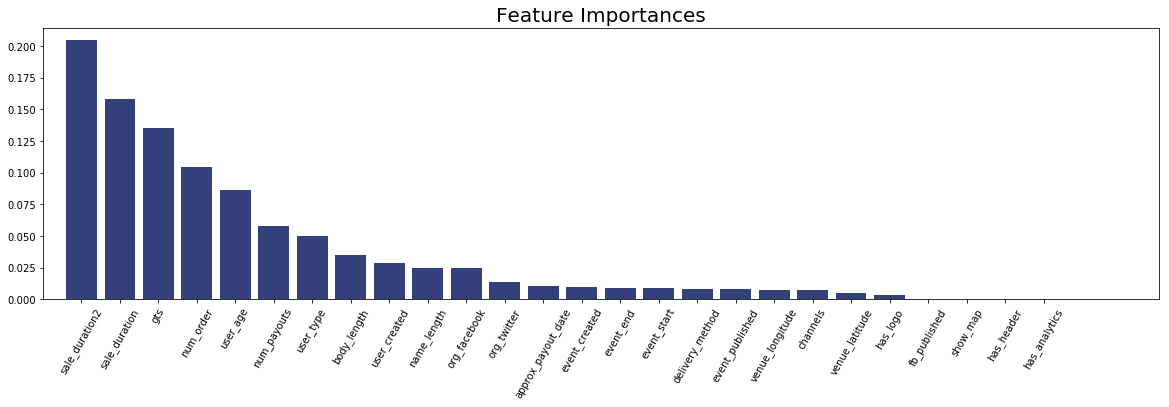

In [31]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = list(X_train.columns[indices])
print (importances[indices])
plt.figure(figsize=(20,5))
plt.title("Feature Importances", {'fontsize':20})
plt.bar(range(26), importances[indices], color="#334079", align="center")
plt.xticks(range(26), feature_names, rotation=60)
plt.xlim([-1, 28])

In [32]:
# Keeping due to feature importances: 
feats_edit = [('sale_duration2', 0.20426352742189158),
 ('sale_duration', 0.15801737978969788),
 ('gts', 0.13484177317110657),
 ('num_order', 0.1046436882782518),
 ('user_age', 0.086175028273143425),
 ('num_payouts', 0.057729226705314503),
 ('user_type', 0.049605734604420818),
 ('body_length', 0.035150266092310409),
 ('user_created', 0.028327046046029807),
 ('name_length', 0.024814667111288529),
 ('org_facebook', 0.024655222121577419)]

In [33]:
numeric_features = []
for item in feats_edit: 
    numeric_features.append(item[0])
# NEED TO FINISH THIS BIT 

In [34]:
final_features = numeric_features[2:]

In [35]:
numeric_features[2:]

['gts',
 'num_order',
 'user_age',
 'num_payouts',
 'user_type',
 'body_length',
 'user_created',
 'name_length',
 'org_facebook']

In [36]:
df_crosstab1 = pd.crosstab(df['fraud'],df['country'])
#df_crosstab1.plot(kind='bar')
#plt.plot()
grp_by_cntry = df_crosstab1.T
grp_by_cntry.columns = [['NotFraud','Fraud']]
grp_by_cntry['Fraud_percent'] = (grp_by_cntry['Fraud']*100)/(grp_by_cntry['NotFraud']+grp_by_cntry['Fraud'])

grp_by_cntry.sort_values('NotFraud',ascending=False)

,NotFraud,Fraud,Fraud_percent
country,,,
US,8615,619,6.703487
GB,1789,294,14.114258
CA,1209,53,4.199683
AU,727,15,2.021563
,276,40,12.658228
NZ,59,14,19.178082
IE,48,0,0.000000
FR,37,3,7.500000
NL,30,6,16.666667


## Logistic Regression

In [37]:
logreg = linear_model.LogisticRegression()

In [38]:
ss = StandardScaler()

In [39]:
ss.fit(X_train)
s_X_train = ss.transform(X_train)
ss.fit(X_test)
s_X_test = ss.transform(X_test)

In [40]:
lr_model = logreg.fit(s_X_train, y_train)

In [41]:
lr_y_pred = logreg.predict(s_X_test)

In [42]:
print('Score:', lr_model.score(s_X_test, y_test))

('Score:', 0.94867503486750349)


In [43]:
print_scores(y_test, lr_y_pred)

('Accuracy:', 0.94867503486750349)
('Precision:', 0.78400000000000003)
('Recall:', 0.60122699386503065)


## Random Forest WITHOUT SALES DURATION FEATURES

In [44]:
final_fts = ['gts',
             'num_order',
             'user_age',
             'num_payouts',
             'user_type',
             'body_length',
             'user_created',
             'name_length',
             'org_facebook']

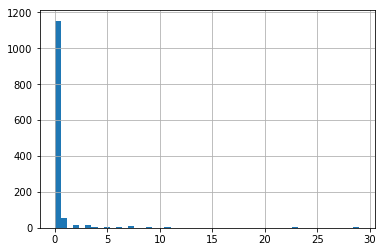

In [45]:
df[df['fraud']==1].num_payouts.hist(bins=50)

In [46]:
X_df_FINAL = df[final_fts]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_df_FINAL, y_df, test_size=0.25, random_state=42)

In [48]:
rfc = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [49]:
rf_model = rfc.fit(X_train, y_train)

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/jennytang/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

In [50]:
rf_y_pred = rf_model.predict(X_test)

In [51]:
print_scores(y_test, rf_y_pred)

('Accuracy:', 0.96624825662482561)
('Precision:', 0.86219081272084808)
('Recall:', 0.74846625766871167)


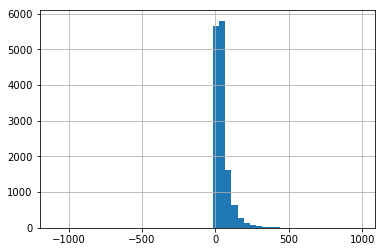

In [52]:
df.sale_duration.hist(bins=50)
plt.show()

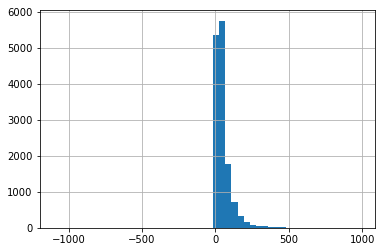

In [53]:
df.sale_duration2.hist(bins=50)
plt.show()

In [54]:
random_forest_grid = {'max_depth': [3, None, 20],
                     'max_features': ['sqrt', 'log2', None],
                     'min_samples_split': [2, 4, 6],
                     'min_samples_leaf': [1, 2],
                     'bootstrap': [True, False],
                     'n_estimators': [100,200],
                     'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                            random_forest_grid,
                            n_jobs=-1,
                            verbose=True,
                            scoring='recall')

rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  8.8min finished


('best parameters:', {'bootstrap': True, 'min_samples_leaf': 2, 'n_estimators': 100, 'min_samples_split': 2, 'random_state': 1, 'max_features': None, 'max_depth': None})


In [55]:
best_rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [57]:
cv1 = KFold(n_splits=5,shuffle=True,random_state=10)
cross_val_score(best_rf_model,X_train,y_train,cv=5,scoring='recall')

array([ 0.73195876,  0.75773196,  0.64248705,  0.79792746,  0.70466321])